In [ ]:
import random
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
train_df = pd.read_csv("train.csv")
international = pd.read_csv("international_trade.csv")

In [ ]:
international.describe()

,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
count,1.274000e+03,1274.000000,1.274000e+03,1274.000000,1274.000000
mean,2.005844e+05,360.425432,1.255735e+06,1548.219780,-1187.789639
std,9.669554e+05,1689.359223,3.680257e+06,5844.805789,6171.655116
min,0.000000e+00,0.000000,0.000000e+00,0.000000,-84117.000000
25%,0.000000e+00,0.000000,0.000000e+00,0.000000,-1240.500000
50%,1.255000e+02,1.000000,2.926950e+04,89.500000,-61.500000
75%,1.556525e+04,31.000000,1.022696e+06,1253.000000,9.000000
max,2.094942e+07,16278.000000,4.975914e+07,84118.000000,16278.000000


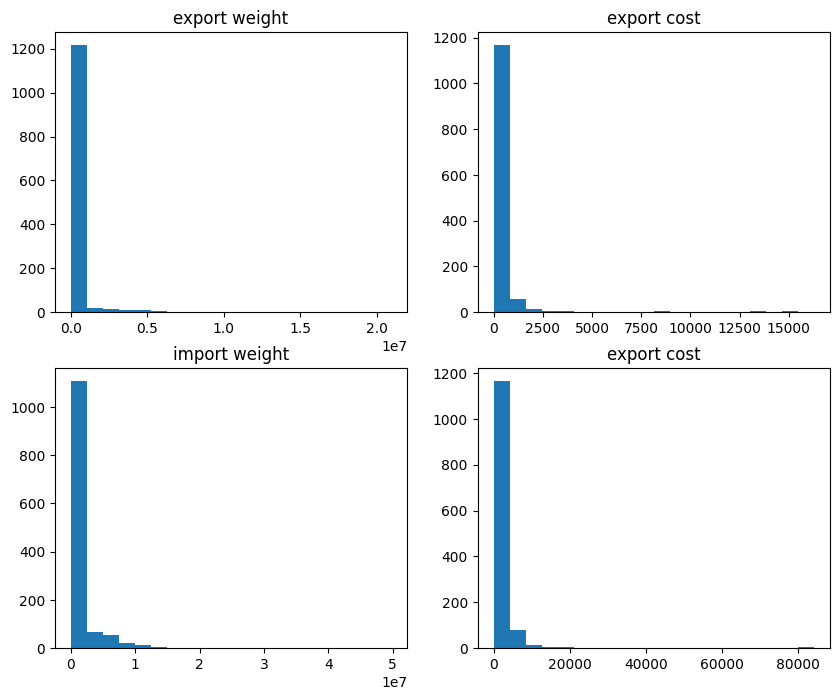

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
plt.hist(international['수출 중량'], bins=20)
plt.title("export weight")

plt.subplot(2,2,2)
plt.hist(international['수출 금액'], bins=20)
plt.title("export cost")

plt.subplot(2,2,3)
plt.hist(international['수입 중량'], bins=20)
plt.title("import weight")

plt.subplot(2,2,4)
plt.hist(international['수입 금액'], bins=20)
plt.title("export cost")
plt.show()

In [ ]:
international['수출 증량']

In [ ]:
new_train_df = train_df.rename({"corporation":"corp", "location":"loc"}, axis=1)

In [ ]:
new_train_df.head(10)

,ID,timestamp,item,corp,loc,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
5,TG_A_J_20190106,2019-01-06,TG,A,J,0.0,0.0
6,TG_A_J_20190107,2019-01-07,TG,A,J,44995.0,1474.0
7,TG_A_J_20190108,2019-01-08,TG,A,J,26975.0,1326.0
8,TG_A_J_20190109,2019-01-09,TG,A,J,29265.0,1428.0
9,TG_A_J_20190110,2019-01-10,TG,A,J,21226.0,1433.0


In [ ]:
new_train_df.drop(['supply(kg)','loc'],axis=1, inplace=True)
new_train_df.head()

KeyError: "['loc'] not found in axis"

In [ ]:
new_train_df.rename({"supply(kg)":"supply", "price(kg/원)":"price"},axis=1,inplace=True)

In [ ]:
new_train_df['supply'].mean()

np.float64(11894.525186962304)

In [ ]:
new_train_df.loc[new_train_df['supply']>=new_train_df['supply'].mean()]

,ID,timestamp,item,corp,loc,supply,price(원/kg)
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
6,TG_A_J_20190107,2019-01-07,TG,A,J,44995.0,1474.0
7,TG_A_J_20190108,2019-01-08,TG,A,J,26975.0,1326.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [ ]:
new_train_df.iloc[::2,:4]

,ID,timestamp,item,corp
0,TG_A_J_20190101,2019-01-01,TG,A
2,TG_A_J_20190103,2019-01-03,TG,A
4,TG_A_J_20190105,2019-01-05,TG,A
6,TG_A_J_20190107,2019-01-07,TG,A
8,TG_A_J_20190109,2019-01-09,TG,A
...,...,...,...,...
59388,RD_F_J_20230223,2023-02-23,RD,F
59390,RD_F_J_20230225,2023-02-25,RD,F
59392,RD_F_J_20230227,2023-02-27,RD,F
59394,RD_F_J_20230301,2023-03-01,RD,F


In [ ]:
train_df['timestamp']= pd.to_datetime(train_df['timestamp'])

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


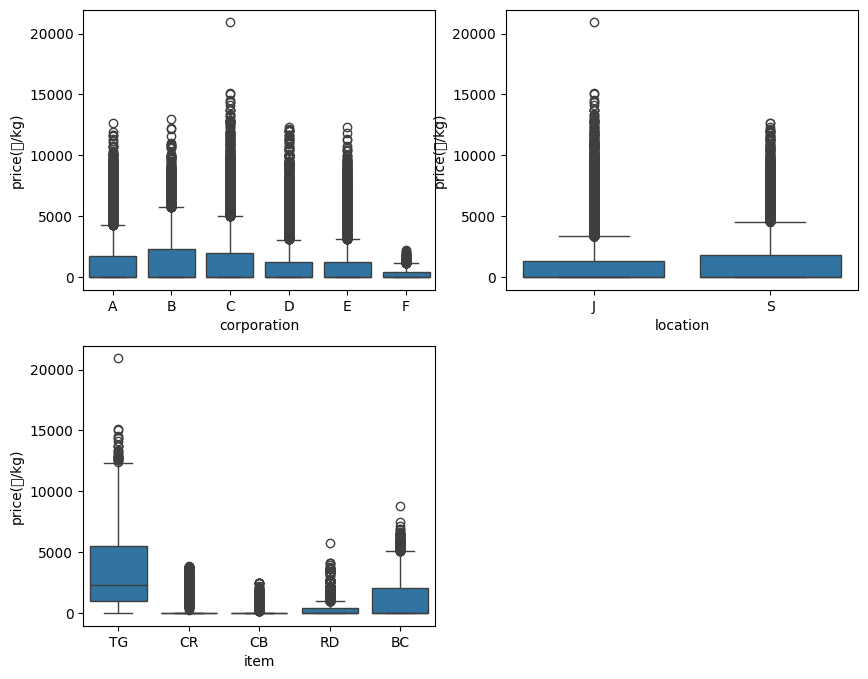

In [ ]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.boxplot(x="corporation", y="price(원/kg)", data=train_df)

plt.subplot(2,2,2)
sns.boxplot(x="location", y="price(원/kg)", data=train_df)

plt.subplot(2,2,3)
sns.boxplot(x="item", y="price(원/kg)", data=train_df)

plt.show()

<Axes: xlabel='supply(kg)', ylabel='price(원/kg)'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


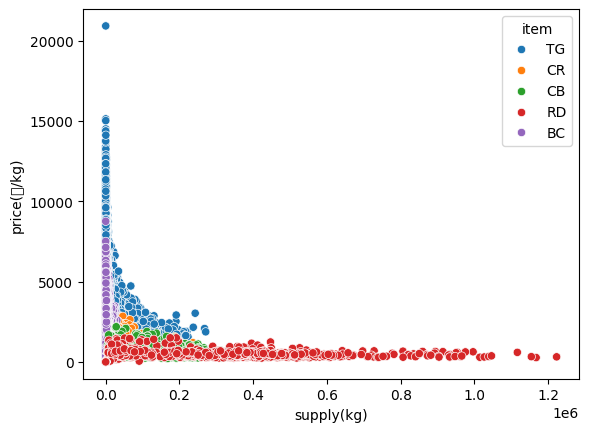

In [ ]:
sns.scatterplot(data=train_df, x="supply(kg)", y="price(원/kg)", hue="item")

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


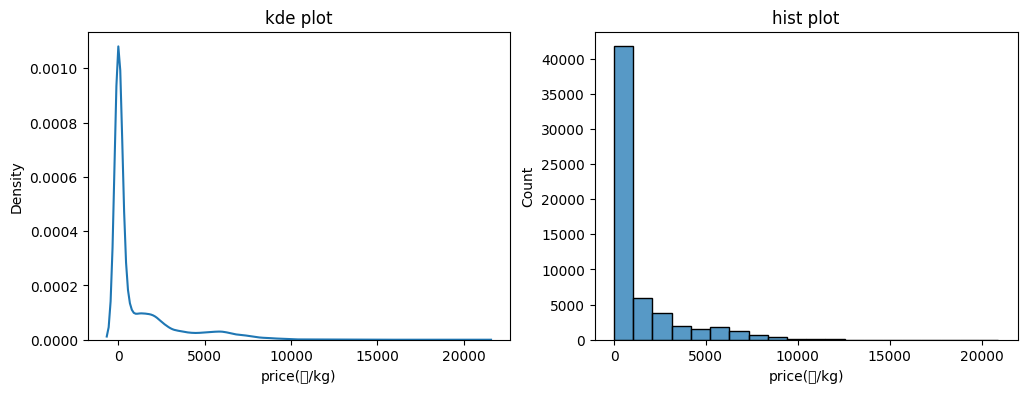

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(data=train_df, x="price(원/kg)")
plt.title('kde plot')

plt.subplot(1,2,2)
sns.histplot(data=train_df, x="price(원/kg)", bins=20)
plt.title('hist plot')

plt.show()

In [ ]:
sns.kdeplot(data=train_df, x="price(원/kg)")

In [ ]:
train_df.groupby('item')['price(원/kg)'].mean()

,price(원/kg)
item,
BC,910.196615
CB,152.187131
CR,273.118938
RD,187.073539
TG,3177.442022


<Axes: xlabel='month', ylabel='price(원/kg)'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


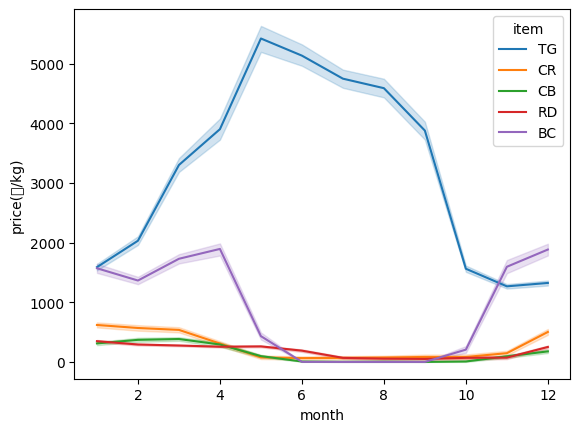

In [ ]:
train_df['month'] = train_df['timestamp'].dt.month
sns.lineplot(data=train_df, x='month', y='price(원/kg)', hue='item')

In [ ]:
train_df[['supply(kg)','price(원/kg)']].corr()

,supply(kg),price(원/kg)
supply(kg),1.000000,-0.002297
price(원/kg),-0.002297,1.000000


In [ ]:
itemlist = list(train_df['item'].unique())

In [ ]:
sup_nozero = train_df.loc[train_df['supply(kg)']!=0]

In [ ]:
sup_nozero['y/m'] = sup_nozero['timestamp'].dt.strftime('%Y/%m')

<ipython-input-138-82d493416d56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sup_nozero['y/m'] = sup_nozero['timestamp'].dt.strftime('%Y/%m')


<Axes: xlabel='y/m', ylabel='price(원/kg)'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


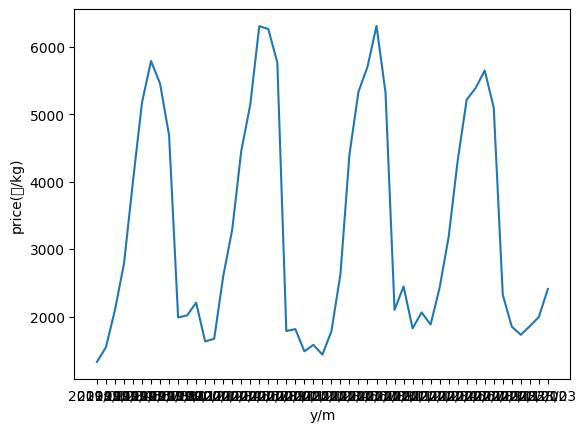

In [ ]:
sns.lineplot(data=sup_nozero.groupby('y/m')['price(원/kg)'].mean())

In [ ]:
sup_nozero.dtypes

,0
ID,object
timestamp,datetime64[ns]
item,object
corporation,object
location,object
supply(kg),float64
price(원/kg),float64
month,int32
y/m,object


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


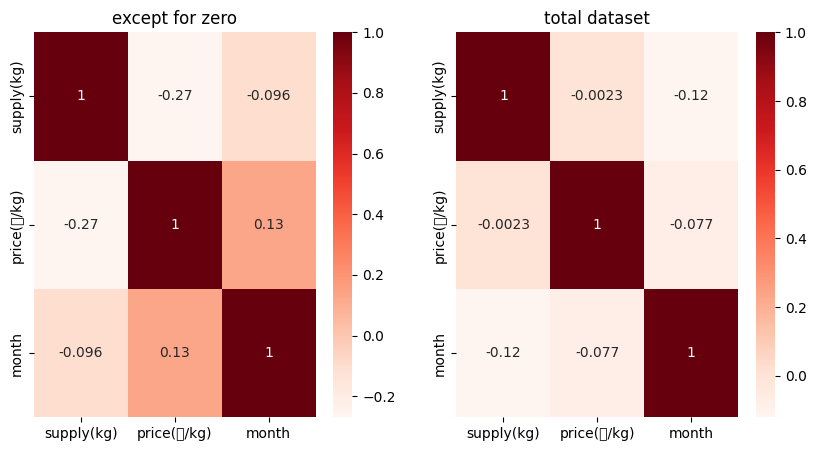

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.heatmap(sup_nozero.select_dtypes(include=[np.number]).corr(), annot=True, cmap="Reds")
plt.title("except for zero")

plt.subplot(1,2,2)
sns.heatmap(train_df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="Reds")
plt.title("total dataset")

plt.show()


In [ ]:
!pip install pytimekr

  Preparing metadata (setup.py) ... done
  Created wheel for pytimekr: filename=pytimekr-0.1.0-py3-none-any.whl size=7922 sha256=c1b09cb8d07252aa0aa61765531a79a7bc55016f65a3cb106b4817916dec1552
  Stored in directory: /root/.cache/pip/wheels/91/04/0d/c0f359b149cb8d33e80876f2dee1cb28d5c8f11a5a14eb501d
Successfully built pytimekr


In [ ]:
train_df['timestamp'][0].weekday()

1

In [ ]:
# 휴일 여부 이진 변수
from pytimekr import pytimekr

holi19 = pytimekr.holidays(year=2019)
holi20 = pytimekr.holidays(year=2020)
holi21 = pytimekr.holidays(year=2021)
holi22 = pytimekr.holidays(year=2022)
holi23 = pytimekr.holidays(year=2023)

def holimake(x):
  if x.weekday() in range(5,8):
    return 1
  if x.year==2019 and x in holi19:
    return 1
  elif x.year==2020 and x in holi20:
    return 1
  elif x.year==2021 and x in holi21:
   return 1
  elif x.year==2022 and x in holi22:
    return 1
  elif x.year==2023 and x in holi23:
    return 1
  else:
    return 0

train_df['holidy'] = train_df['timestamp'].apply(holimake)

In [ ]:

def remove_outliers(df, columns):

    filtered_df = df.copy()

    for col in columns:
        Q1 = filtered_df[col].quantile(0.25)
        Q3 = filtered_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 해당 열에서 lower_bound 미만 또는 upper_bound 초과인 행은 제거
        filtered_df = filtered_df[(filtered_df[col] >= lower_bound) & (filtered_df[col] <= upper_bound)]

    return filtered_df

no_outlier = remove_outliers(train_df, ['price(원/kg)','supply(kg)'])

In [ ]:
train_df['supply(kg)'].value_counts()

,count
supply(kg),
0.0,35452
4300.0,181
8600.0,85
8620.0,84
200.0,83
...,...
21226.0,1
26975.0,1
44995.0,1


In [ ]:
no_outlier.describe()

,timestamp,supply(kg),price(원/kg),month,holidy
count,43140,43140.000000,43140.000000,43140.000000,43140.000000
mean,2021-02-05 08:24:24.033379584,690.054223,336.502944,6.578952,0.334956
min,2019-01-01 00:00:00,0.000000,0.000000,1.000000,0.000000
25%,2020-01-22 00:00:00,0.000000,0.000000,4.000000,0.000000
50%,2021-02-04 00:00:00,0.000000,0.000000,7.000000,0.000000
75%,2022-02-20 00:00:00,0.000000,0.000000,10.000000,1.000000
max,2023-03-03 00:00:00,10061.000000,3797.000000,12.000000,1.000000
std,NaN,1985.066955,838.541572,3.420722,0.471981


<Axes: xlabel='supply(kg)', ylabel='Count'>

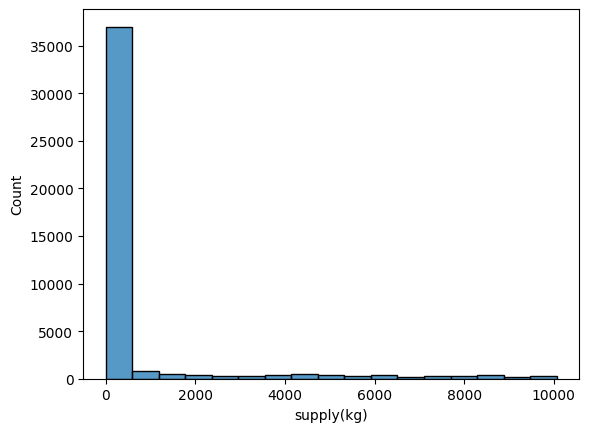

In [ ]:
sns.histplot(data=no_outlier, x="supply(kg)")

In [ ]:
train_df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),month,holidy
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,1,0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,1,0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,1,0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,1,0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,1,1
...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2,0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2,0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,3,0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,3,0


<Axes: xlabel='supply(kg)', ylabel='Count'>

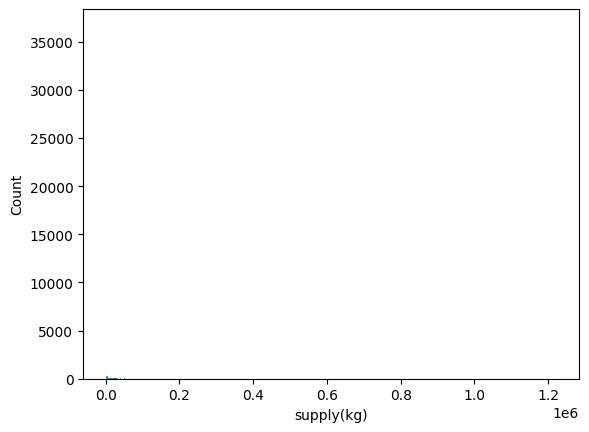

In [ ]:
sns.histplot(data=train_df, x="supply(kg)")

In [ ]:
nec_trade = international[international['품목명'].str.contains('감귤|브로콜리|무|당근|양배추')]

In [ ]:
nec_trade = nec_trade[nec_trade['품목명']!="무화과"]

In [ ]:
nec_trade['품목명'] = nec_trade['품목명'].replace("꽃양배추와 브로콜리(broccoli)", "브로콜리")
nec_trade['품목명'] = nec_trade['품목명'].replace("방울다다기 양배추", "양배추")

nec_trade['품목명'].unique()

array(['브로콜리', '양배추', '당근', '감귤', '순무'], dtype=object)

In [ ]:
item_dict = {'브로콜리':'BC', '감귤':'TG', '순무':'RD', '당근':'CR', '양배추':'CB'}

nec_trade['품목명'] = nec_trade['품목명'].map(item_dict)

In [ ]:
train_df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),month,holidy
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,1,0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,1,0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,1,0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,1,0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,1,1
...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2,0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2,0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,3,0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,3,0


In [ ]:
nec_trade

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
3,2019-01,BC,160,1,638913,563,-562
4,2019-01,CB,0,0,7580,38,-38
5,2019-01,CB,184650,94,395802,90,4
8,2019-01,CR,23150,22,7466150,2955,-2934
17,2019-01,TG,58368,172,0,0,172
...,...,...,...,...,...,...,...
1249,2023-02,CB,71,1,10362,55,-55
1250,2023-02,CB,13188,13,377456,104,-91
1253,2023-02,CR,22510,20,9260020,3758,-3737
1254,2023-02,RD,4000,4,2,0,4
